In [11]:
import pymc3 as pm
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import theano
import sympy
from pymc3.distributions import Continuous
from pymc3.distributions import distribution
%matplotlib inline

## This notebook will test the probablilistic programming modeule PyMC 

### Below we we will attempt to recover the true parameter of our normally distributed data , we do this by defining our likelihood function as | inj - inf | and say that on average this gives 0 from our observations. the inf_param is then learnt

In [2]:
with pm.Model() as match : 
    data = np.linspace(0 , 10 , 11)
    approx = np.linspace(0,8 , 11)
    diff = np.linalg.norm(data - approx)
    prior = pm.Normal('prior', mu = 0 , sd =5)
    #mu = pm.Normal('mu' , mu = 3 , sd = 1)
    inj_param = 12
    inf_param = pm.Normal('inf' , mu = 8 , sd = 100 )
    likelihood = pm.Normal('obs' , mu = np.linalg.norm(inj_param - inf_param)
                           , sd =1 , observed = np.random.normal( 0 , 1, 1000))
    #trace = pm.sample(2000 , tune = 500)
    approx =pm.fit(n = 6000)

Average Loss = 4,094.7: 100%|██████████| 6000/6000 [00:09<00:00, 615.52it/s]
Finished [100%]: Average Loss = 4,089.8


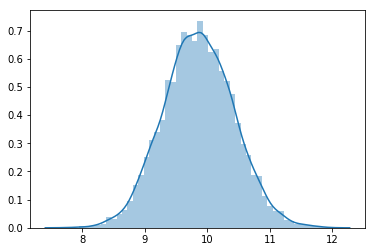

In [3]:
plt.figure()
trace = approx.sample(10000)
sns.distplot(trace['inf']);

Text(0.5,0,'iterarions')

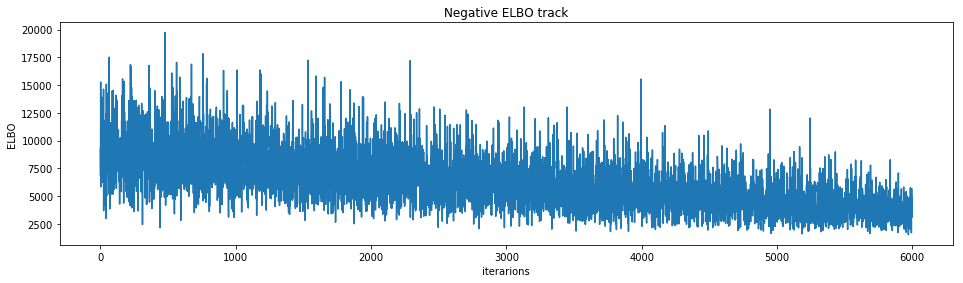

In [4]:
fig = plt.figure(figsize=(16, 9))
hist_ax = fig.add_subplot(212)
hist_ax.plot(approx.hist)
hist_ax.set_title('Negative ELBO track')
hist_ax.set_ylabel('ELBO')
hist_ax.set_xlabel('iterarions')

### Below we carry out a similar test but here we try to learn the co-efficients of a cubic function

In [5]:
with pm.Model() as match : 
    data = np.linspace(1 , 10 , 10000)
    data1 = np.linspace(1 , 10 , 10000)**2
    data2 = np.linspace(1 , 10 , 10000)**3
    inj_line = 10 * data + 4*data1 + 8 * data2 + 50
    inf_a1 = pm.Normal('inf_a1' , mu = 2 , sd = 100)
    inf_a2 = pm.Normal('inf_a2' , mu = 2 , sd = 100)
    inf_a3 = pm.Normal('inf_a3' , mu = 2 , sd = 100)
    inf_bias = pm.Normal('inf_bias' , mu = 1 , sd = 100)
    inf_line = inf_a1 * data + inf_a2 * data1 + inf_a3* data2 + inf_bias
    likelihood = pm.Normal('obs' , mu = np.linalg.norm(inj_line - inf_line)
                           , sd =1 , observed = np.random.normal( 0 , 1, 10000))
    #trace = pm.sample(2000 , tune = 500)
    #approx = pm.fit(5000 , method='svgd', inf_kwargs = dict(n_particles=500),
    #                    obj_optimizer= pm.sgd(learning_rate=0.0000001))
    approx = pm.fit(method = 'advi',  n = 50000)

Average Loss = 1.2438e+06: 100%|██████████| 50000/50000 [01:27<00:00, 569.20it/s]
Finished [100%]: Average Loss = 1.2433e+06


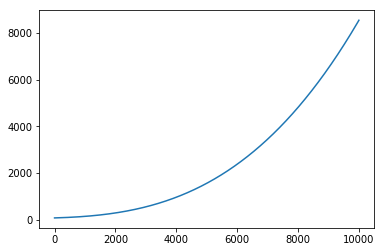

In [10]:
plt.plot(inj_line)

In [6]:
trace = approx.sample(1000)

Text(0.5,0,'iterations')

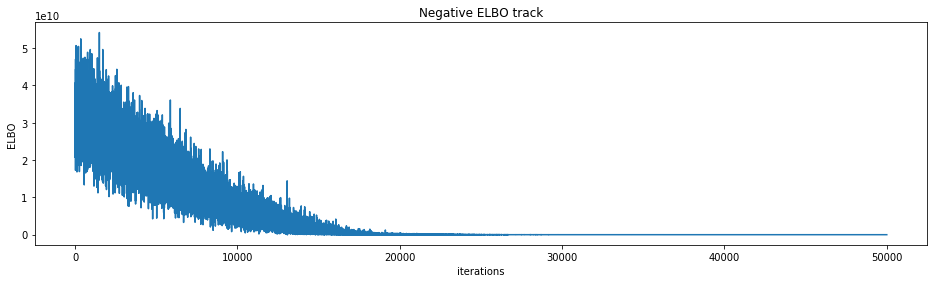

In [7]:
fig = plt.figure(figsize=(16, 9))
hist_ax = fig.add_subplot(212)
hist_ax.plot(approx.hist)
hist_ax.set_title('Negative ELBO track')
hist_ax.set_ylabel('ELBO')
hist_ax.set_xlabel('iterations')
# hist_ax.set_ylim(0,10**5)

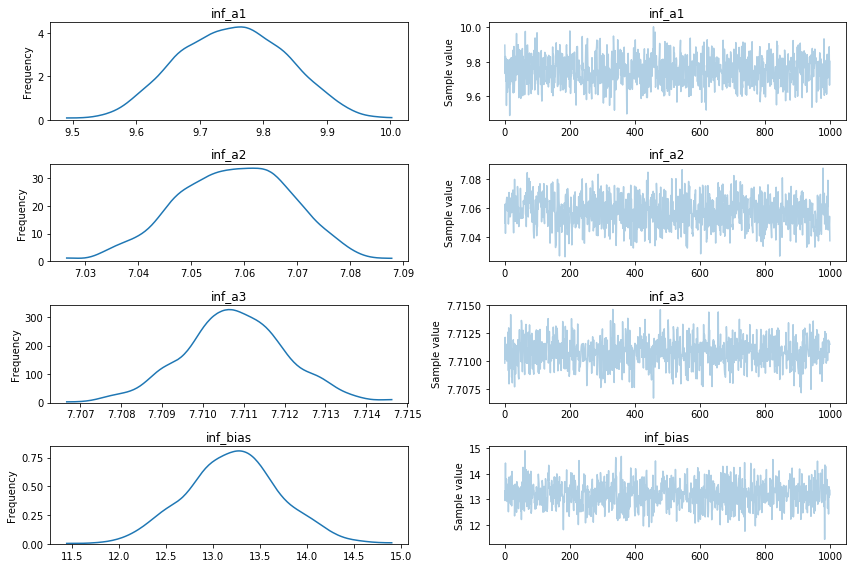

In [8]:
pm.traceplot(trace);

In [9]:
# plt.figure()
# trace = approx.sample(1000)
# sns.kdeplot(trace['inf_a1']);
# plt.xlabel('a1')
# plt.ylabel('frequency')

In [108]:
# plt.figure()
# trace = approx.sample(1000)
# sns.kdeplot(trace['inf_a2']);
# plt.xlabel('a2')
# plt.ylabel('frequency')

In [105]:
# plt.figure()
# trace = approx.sample(1000)
# sns.kdeplot(trace['inf_a3']);
# plt.xlabel('a3')
# plt.ylabel('frequency')

In [104]:
# plt.figure()
# trace = approx.sample(1000)
# sns.kdeplot(trace['inf_bias']);
# plt.xlabel('bias')
# plt.ylabel('frequency')